<a href="https://colab.research.google.com/github/HiteshAI/time-series-analysis/blob/master/time_series_analysis_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series analysis with ARIMA
Get the classic international airline passengers data, download from here https://drive.google.com/open?id=1bay3V9yvDFkAVe70EmaFQsW6DV-XJA4o

## Import libraries and get sample data

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
!pip install pmdarima


In [2]:
#load the data
data = pd.read_csv('international-airline-passengers.csv')
data.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Passengers Monthly Count(in thousands)'}, inplace=True)
print(data.columns)

data.tail()


Index(['Month', 'Passengers Monthly Count(in thousands)'], dtype='object')


,Month,Passengers Monthly Count(in thousands)
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [3]:
#preprocessing (since arima takes univariate series as input)
data.drop('Month',axis=1,inplace=True)
data.head()

,Passengers Monthly Count(in thousands)
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [0]:
data.isnull().sum()
data = data[data['Passengers Monthly Count(in thousands)'].notna()]

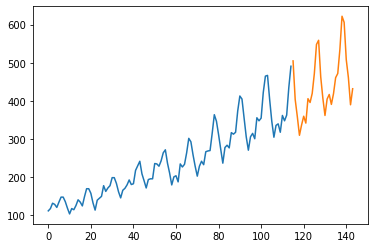

In [25]:
#divide into train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]


#plotting the data
train['Passengers Monthly Count(in thousands)'].plot()
valid['Passengers Monthly Count(in thousands)'].plot()

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1047.202, BIC=1063.619, Time=0.207 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1076.519, BIC=1081.991, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1069.440, BIC=1077.648, Time=0.047 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1064.624, BIC=1072.833, Time=0.064 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1076.271, BIC=1079.007, Time=0.009 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1046.051, BIC=1059.732, Time=0.272 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1045.658, BIC=1059.339, Time=0.432 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too c

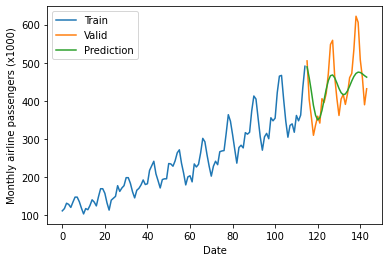

In [26]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])




# **Visualization**

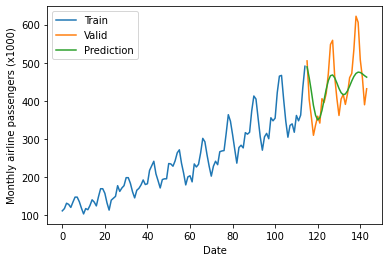

In [30]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.ylabel('Monthly airline passengers (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()

In [31]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

56.47205292256752
